In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
df= pd.read_csv(r"/workspaces/codespaces-jupyter/Copy of energy_production (1).csv", delimiter=";")

In [6]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.value_counts().sum()

9568

In [9]:
df.shape

(9568, 5)

In [225]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [10]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [227]:
df.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [11]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [229]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


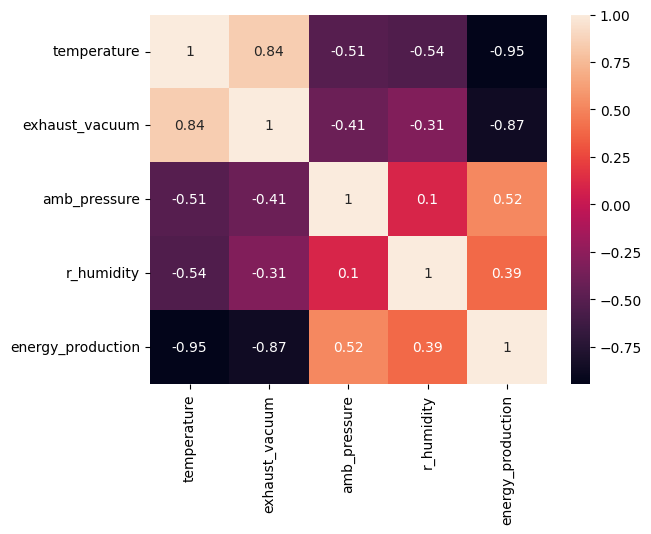

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

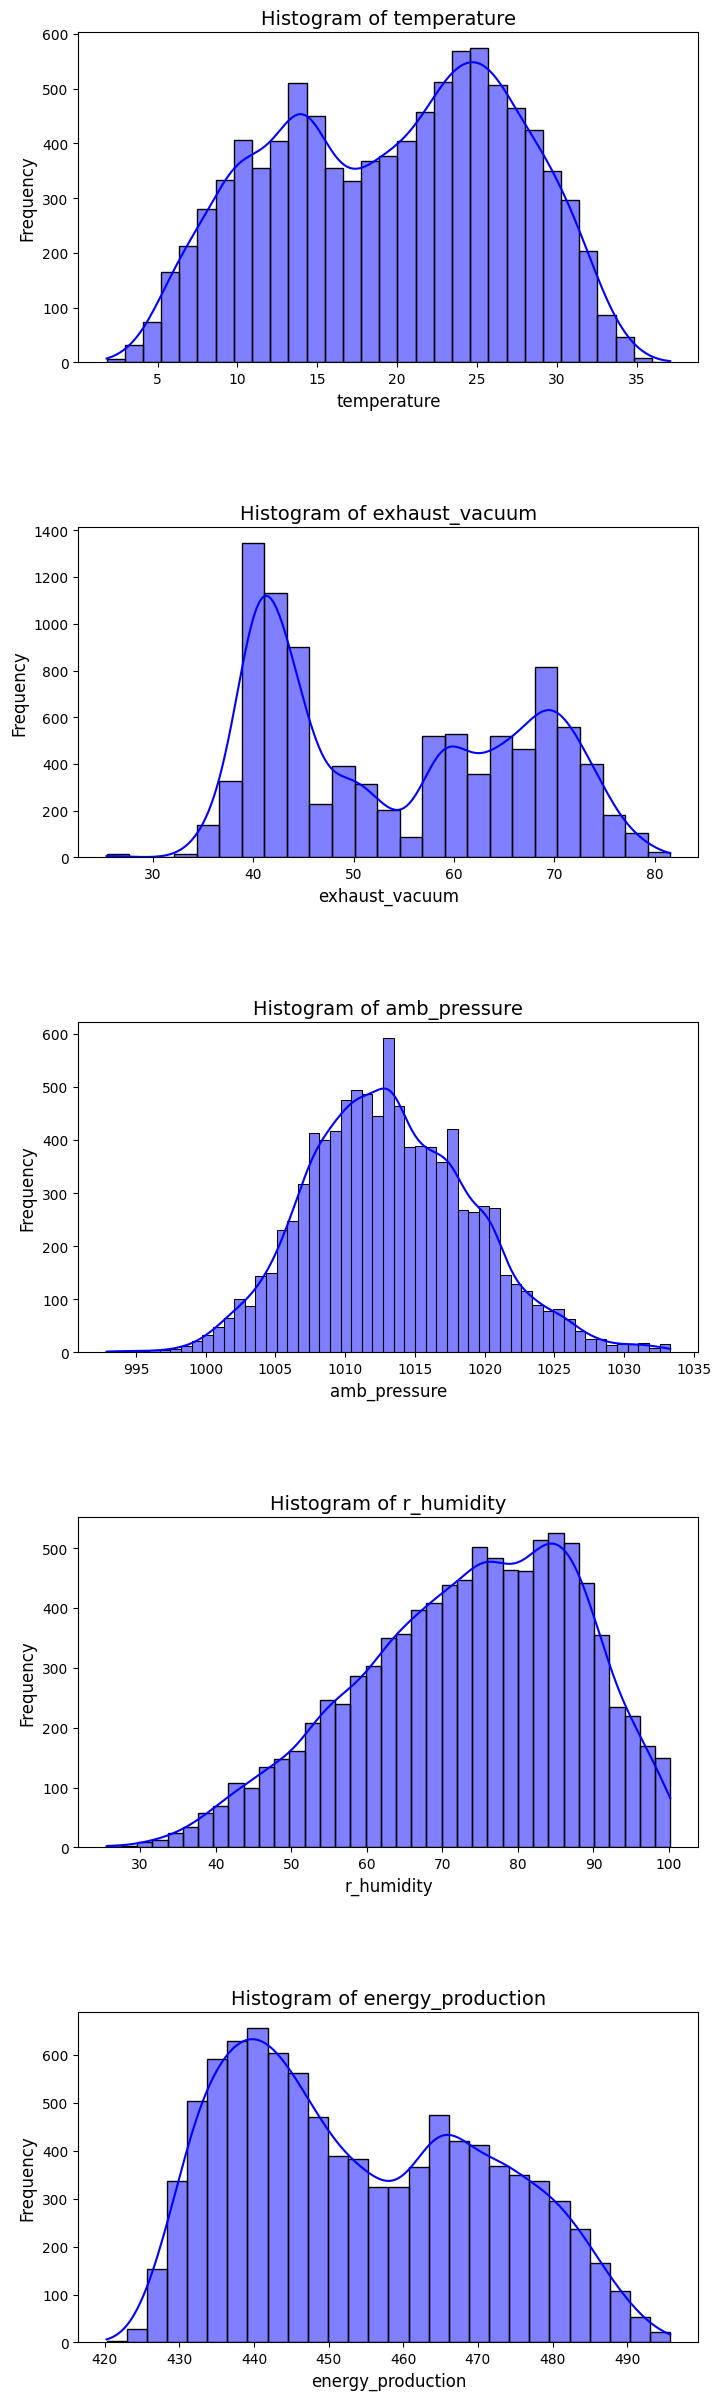

In [13]:
# Define the numerical variables
numerical_vars = ['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity', 'energy_production']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=1, figsize=(8, 6 * len(numerical_vars)))
fig.subplots_adjust(hspace=0.5)

# Create histograms or kernel density plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df[var], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Histogram of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.show()

In [14]:
df[['energy_production', 'exhaust_vacuum']].corr().iloc[0, 1]

-0.8697803096577881

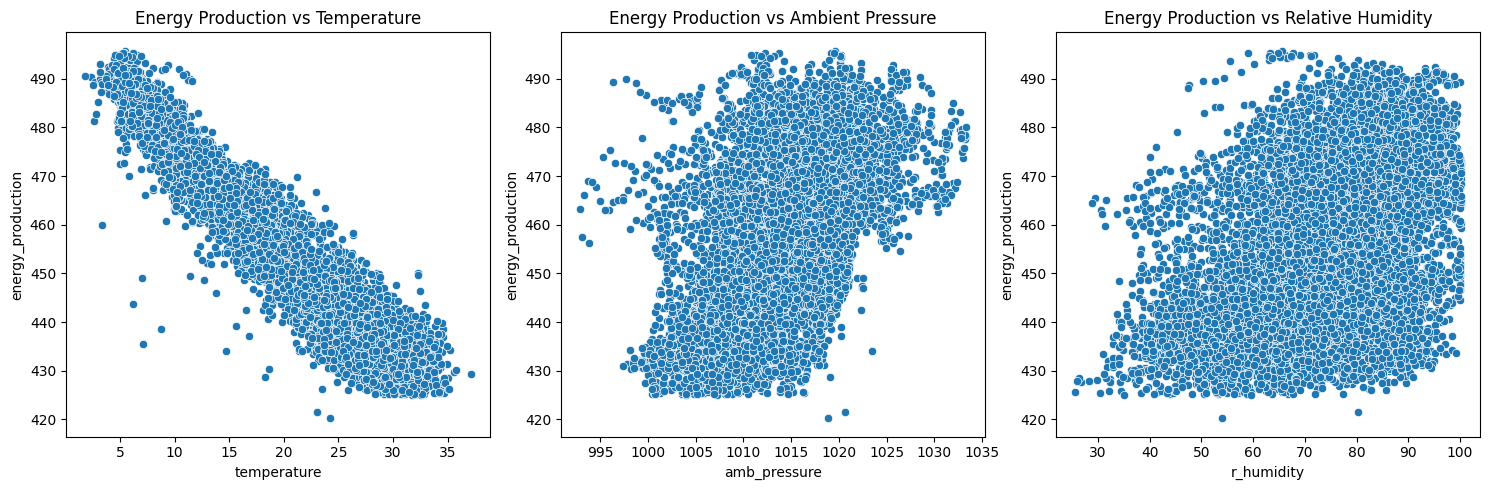

In [15]:
# Visualize the relationship between energy production and ambient variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='temperature', y='energy_production', data=df, ax=axes[0])
axes[0].set_title('Energy Production vs Temperature')

sns.scatterplot(x='amb_pressure', y='energy_production', data=df, ax=axes[1])
axes[1].set_title('Energy Production vs Ambient Pressure')

sns.scatterplot(x='r_humidity', y='energy_production', data=df, ax=axes[2])
axes[2].set_title('Energy Production vs Relative Humidity')

plt.tight_layout()
plt.show()

In [16]:
data=df.copy()
data=data.rename({"temperature":'tem',"exhaust_vacuum":'exh_vac',"amb_pressure":'pressure',"r_humidity":'humidity',"energy_production":'energy_prod'},axis=1)
data.head()

,tem,exh_vac,pressure,humidity,energy_prod
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [17]:
data.duplicated().sum()

41

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(9527, 5)

In [20]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


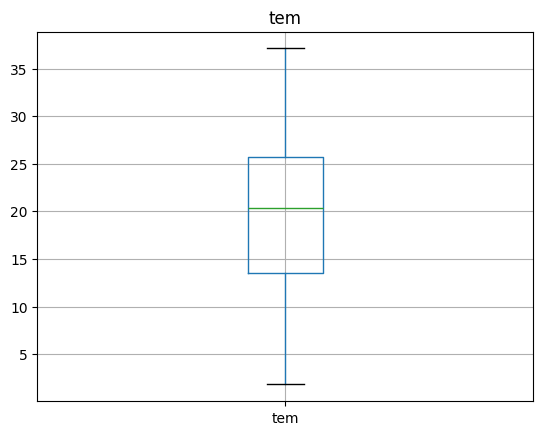

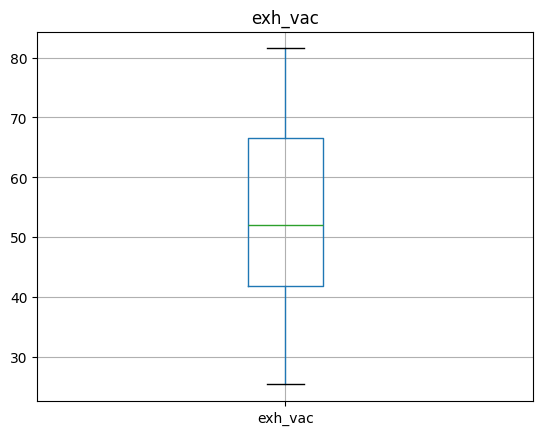

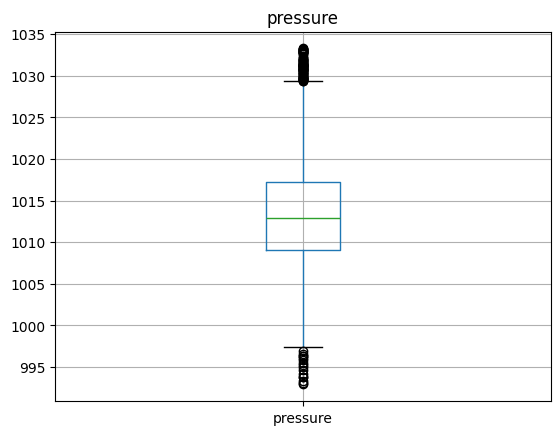

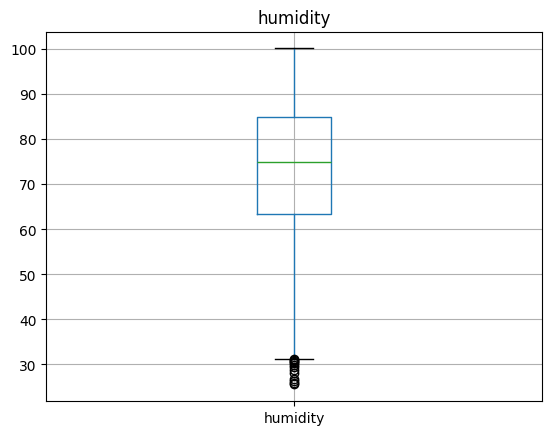

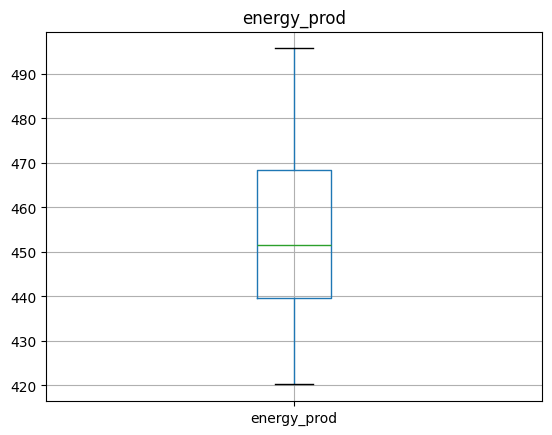

In [21]:
for feature in continuous_feature:
    data=data.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [22]:
import seaborn as sns

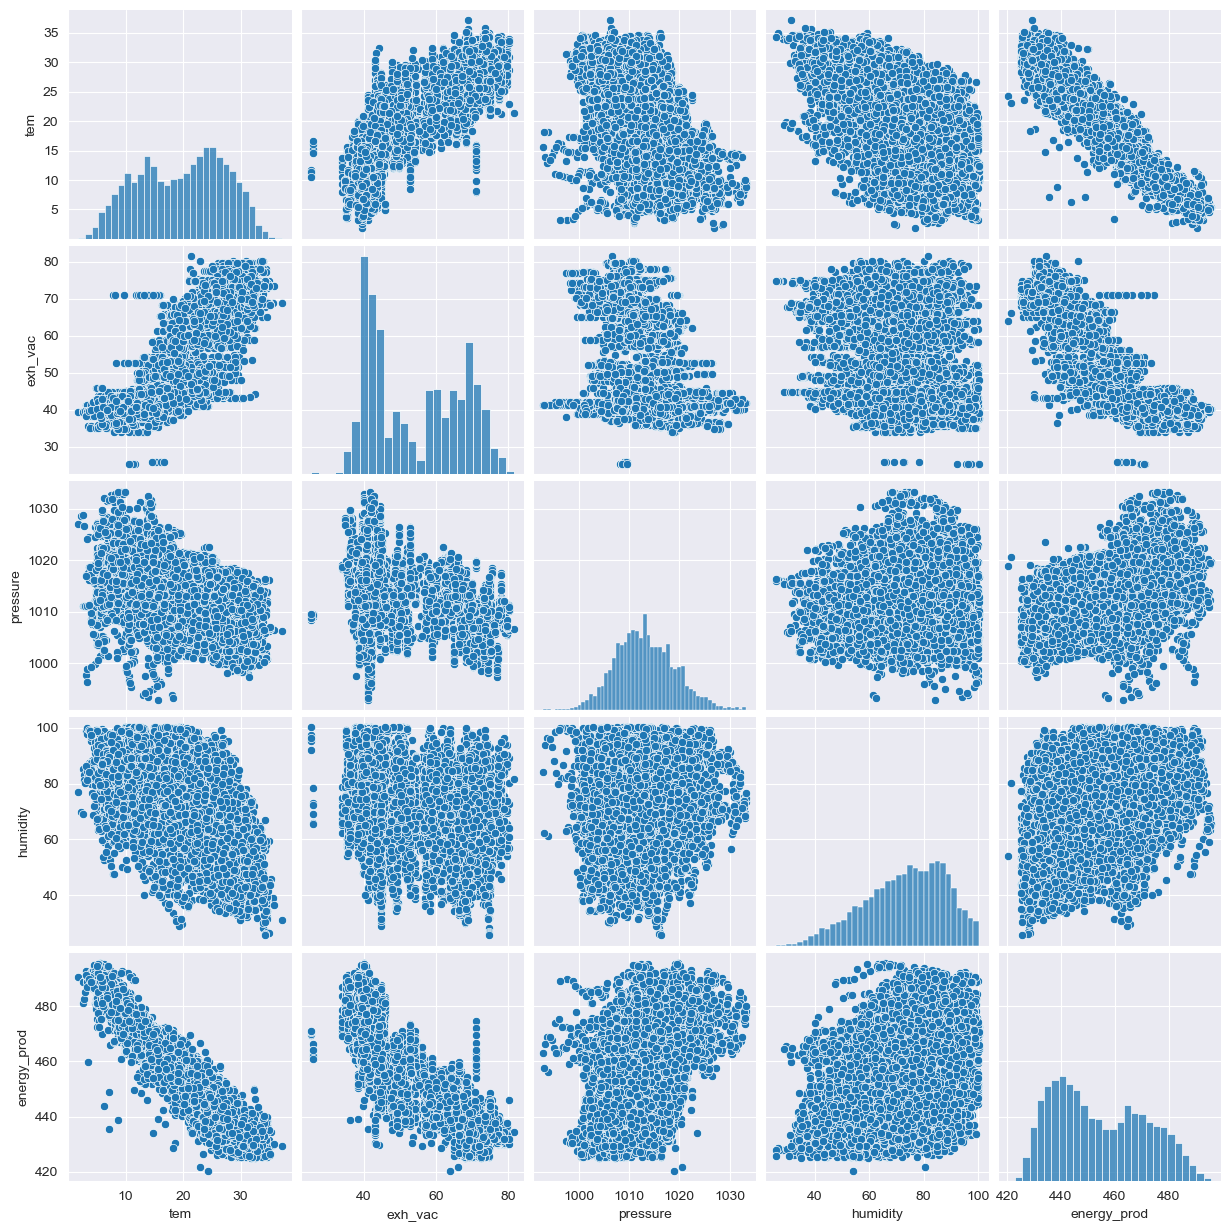

In [241]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [23]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)].dropna()

# Remove outliers from the dataset
cd = remove_outliers_iqr(data)

# Display the cleaned dataset
print("Cleaned Data:")
print(cd)

Cleaned Data:
        tem  exh_vac  pressure  humidity  energy_prod
0      9.59    38.56   1017.01     60.10       481.30
1     12.04    42.34   1019.72     94.67       465.36
2     13.87    45.08   1024.42     81.69       465.48
3     13.72    54.30   1017.89     79.08       467.05
4     15.14    49.64   1023.78     75.00       463.58
...     ...      ...       ...       ...          ...
9563  17.10    49.69   1005.53     81.82       457.32
9564  24.73    65.34   1015.42     52.80       446.92
9565  30.44    56.24   1005.19     56.24       429.34
9566  23.00    66.05   1020.61     80.29       421.57
9567  17.75    49.25   1020.86     63.67       454.41

[9423 rows x 5 columns]


# Feature Selection

In [24]:
X=cd.drop(["energy_prod"], axis=1)
y=cd["energy_prod"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression

In [27]:
# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
selected_features_lasso = X.columns[np.abs(lasso_model.coef_) > 0]
print("Selected features using Lasso:", selected_features_lasso)

Selected features using Lasso: Index(['tem', 'exh_vac', 'pressure', 'humidity'], dtype='object')


In [28]:
from sklearn.linear_model import RidgeCV, ElasticNetCV

# RidgeCV for feature selection
ridgecv_model = RidgeCV(alphas=[0.01, 0.1, 1.0])  # Specify a range of alpha values to search
ridgecv_model.fit(X_train, y_train)
selected_features_ridge = X.columns[np.abs(ridgecv_model.coef_) > 0]

print("Selected features using RidgeCV:", selected_features_ridge)



Selected features using RidgeCV: Index(['tem', 'exh_vac', 'pressure', 'humidity'], dtype='object')


In [29]:
# ElasticNetCV for feature selection
elasticnetcv_model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], alphas=[0.01, 0.1, 1.0]) 
elasticnetcv_model.fit(X_train, y_train)
selected_features_elasticnet = X.columns[np.abs(elasticnetcv_model.coef_) > 0]

print("Selected features using ElasticNetCV:", selected_features_elasticnet)


Selected features using ElasticNetCV: Index(['tem', 'exh_vac', 'pressure', 'humidity'], dtype='object')


In [30]:
# Recursive Feature Elimination
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe_model.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe_model.support_]
print("Selected features using recursive feature elimination:", selected_features_rfe)


Selected features using recursive feature elimination: Index(['tem', 'exh_vac', 'humidity'], dtype='object')


In [31]:
# Information Gain
info_gain_selector = SelectKBest(mutual_info_regression, k=3)
info_gain_selector.fit(X_train, y_train)
selected_features_info_gain = X.columns[info_gain_selector.get_support()]
print("Selected features using information gain:", selected_features_info_gain)

Selected features using information gain: Index(['tem', 'exh_vac', 'pressure'], dtype='object')


In [32]:
# Select common features
common_features = ['tem', 'exh_vac', 'pressure']

X = data[common_features]  # Use common_features identified earlier
y = data['energy_prod']  # Assuming 'energy_production' is the target variable

# Ensure the number of samples is consistent
assert len(X) == len(y), "Number of samples in features and labels are not consistent"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Now proceed with building and evaluating the model as before

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract the common features from the dataset
X_selected = data[common_features]

# Split data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

# Build and train the model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.18192704012954


# Preparing MLR using OLS

In [118]:
!pip install statsmodels
import statsmodels.formula.api as smf 

model_1 = smf.ols(formula='energy_prod~tem+exh_vac+pressure' , data=data).fit()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 8.8 MB/s eta 0:00:00


In [119]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            energy_prod   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        09:53:27   Log-Likelihood:                -28631.
No. Observations:                9527   AIC:                         5.727e+04
Df Residuals:                    9523   BIC:                         5.730e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.0197      9.995     34.720      0.000     327.428     366.612
tem           -1.6318      0.013   -123.291      0.000      -1.658      -1.606
exh_vac       -0.3303      0.007    -44.910      0.000      -0.345      -0.316
pressure       0.1553      0.010     15.860      0.000       0.136       0.174
==============================================================================
Omnibus:                      541.441   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.095
Skew:                          -0.195   Prob(JB):                         0.00
Kurtosis:                       5.157   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model_1.params

Intercept    347.019654
tem           -1.631778
exh_vac       -0.330282
pressure       0.155271
dtype: float64

# Calculating VIF

In [122]:
rsq_tem = smf.ols('tem~exh_vac+pressure+humidity',data=data).fit().rsquared  
vif_tem = 1/(1-rsq_tem) 

rsq_exh_vac = smf.ols('exh_vac~pressure+humidity+tem',data=data).fit().rsquared  
vif_exh_vac = 1/(1-rsq_exh_vac) 

rsq_pressure = smf.ols('pressure~tem+exh_vac+humidity',data=data).fit().rsquared  
vif_pressure = 1/(1-rsq_pressure) 

rsq_humidity = smf.ols('humidity~tem+exh_vac+pressure',data=data).fit().rsquared  
vif_humidity= 1/(1-rsq_humidity) 

# Storing vif values in a data frame
d1 = {'Variables':['tem','exh_vac','pressure','humidity'],'VIF':[vif_tem,vif_exh_vac,vif_pressure,vif_humidity]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,tem,5.968554
1,exh_vac,3.935221
2,pressure,1.451793
3,humidity,1.709384


# Residual Analysis

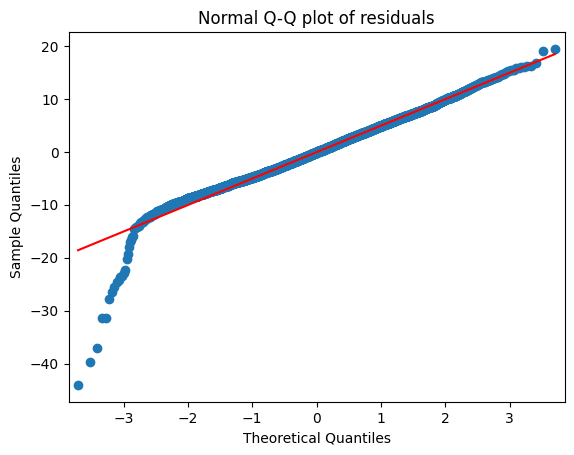

In [123]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 deg. to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [124]:
np.where(model_1.resid>10)

(array([  66,   80,  109,  128,  150,  167,  232,  331,  333,  335,  381,
         438,  450,  488,  532,  538,  669,  685,  763,  795,  802,  891,
         980, 1082, 1118, 1122, 1181, 1193, 1220, 1364, 1422, 1523, 1554,
        1592, 1665, 1669, 1808, 1815, 1824, 2011, 2042, 2126, 2151, 2217,
        2250, 2258, 2404, 2490, 2543, 2555, 2743, 3051, 3056, 3148, 3160,
        3170, 3221, 3230, 3270, 3274, 3276, 3301, 3353, 3363, 3468, 3476,
        3497, 3553, 3573, 3582, 3595, 3600, 3612, 3673, 3754, 3806, 3850,
        3873, 3875, 3931, 3953, 3979, 4024, 4049, 4051, 4088, 4107, 4120,
        4164, 4184, 4191, 4196, 4203, 4210, 4239, 4354, 4356, 4475, 4480,
        4503, 4510, 4530, 4737, 4801, 4826, 4833, 4858, 4879, 4883, 4921,
        5045, 5058, 5090, 5109, 5168, 5174, 5263, 5276, 5331, 5442, 5476,
        5491, 5537, 5598, 5601, 5611, 5618, 5634, 5676, 5706, 5724, 5784,
        5926, 6019, 6070, 6116, 6144, 6188, 6360, 6374, 6431, 6457, 6480,
        6526, 6531, 6604, 6630, 6638, 

In [125]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

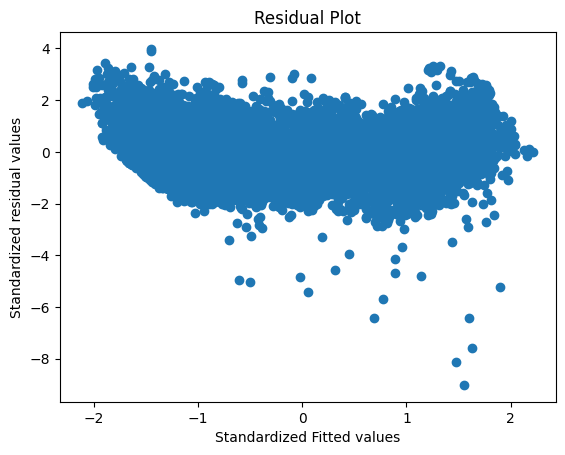

In [126]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

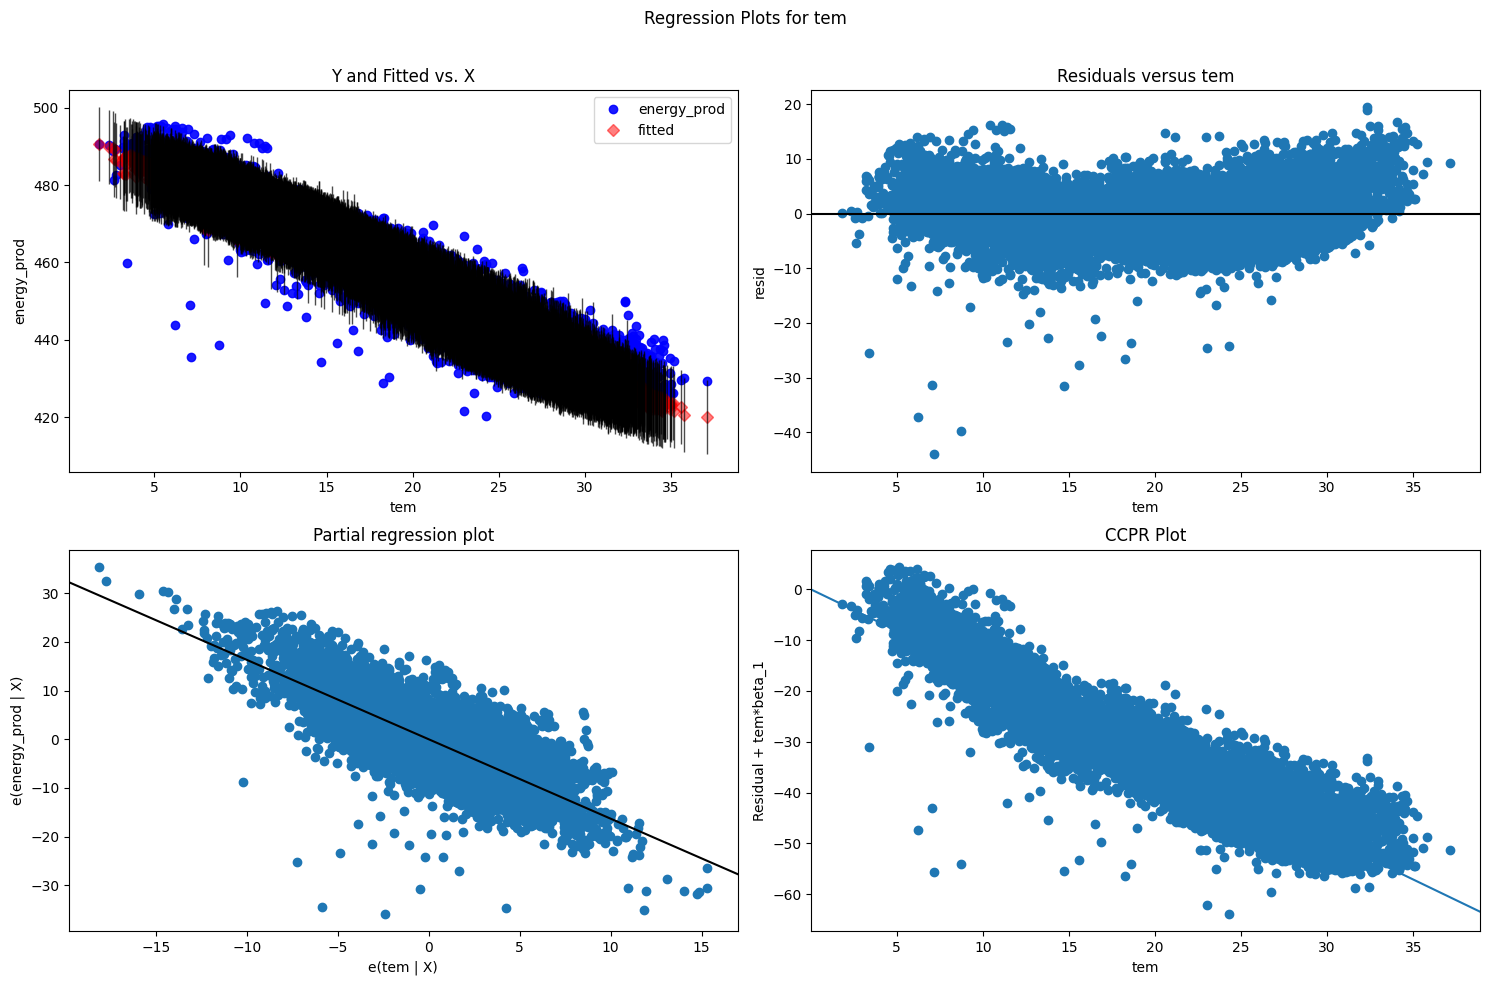

In [127]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "tem", fig=fig)
plt.show()

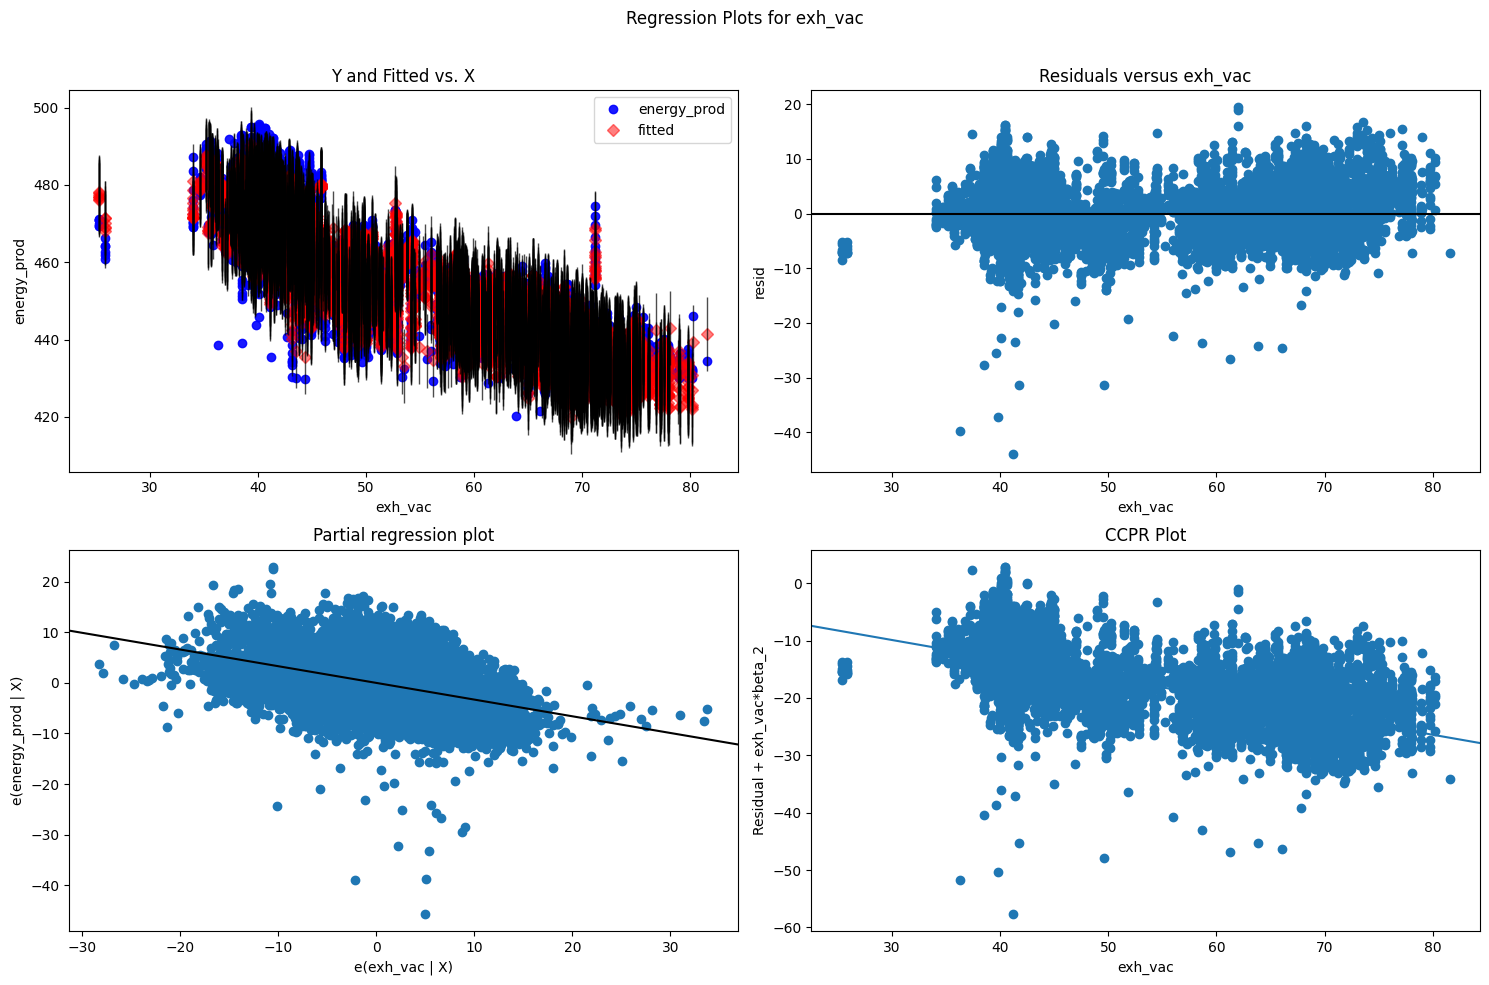

In [128]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "exh_vac", fig=fig)
plt.show()

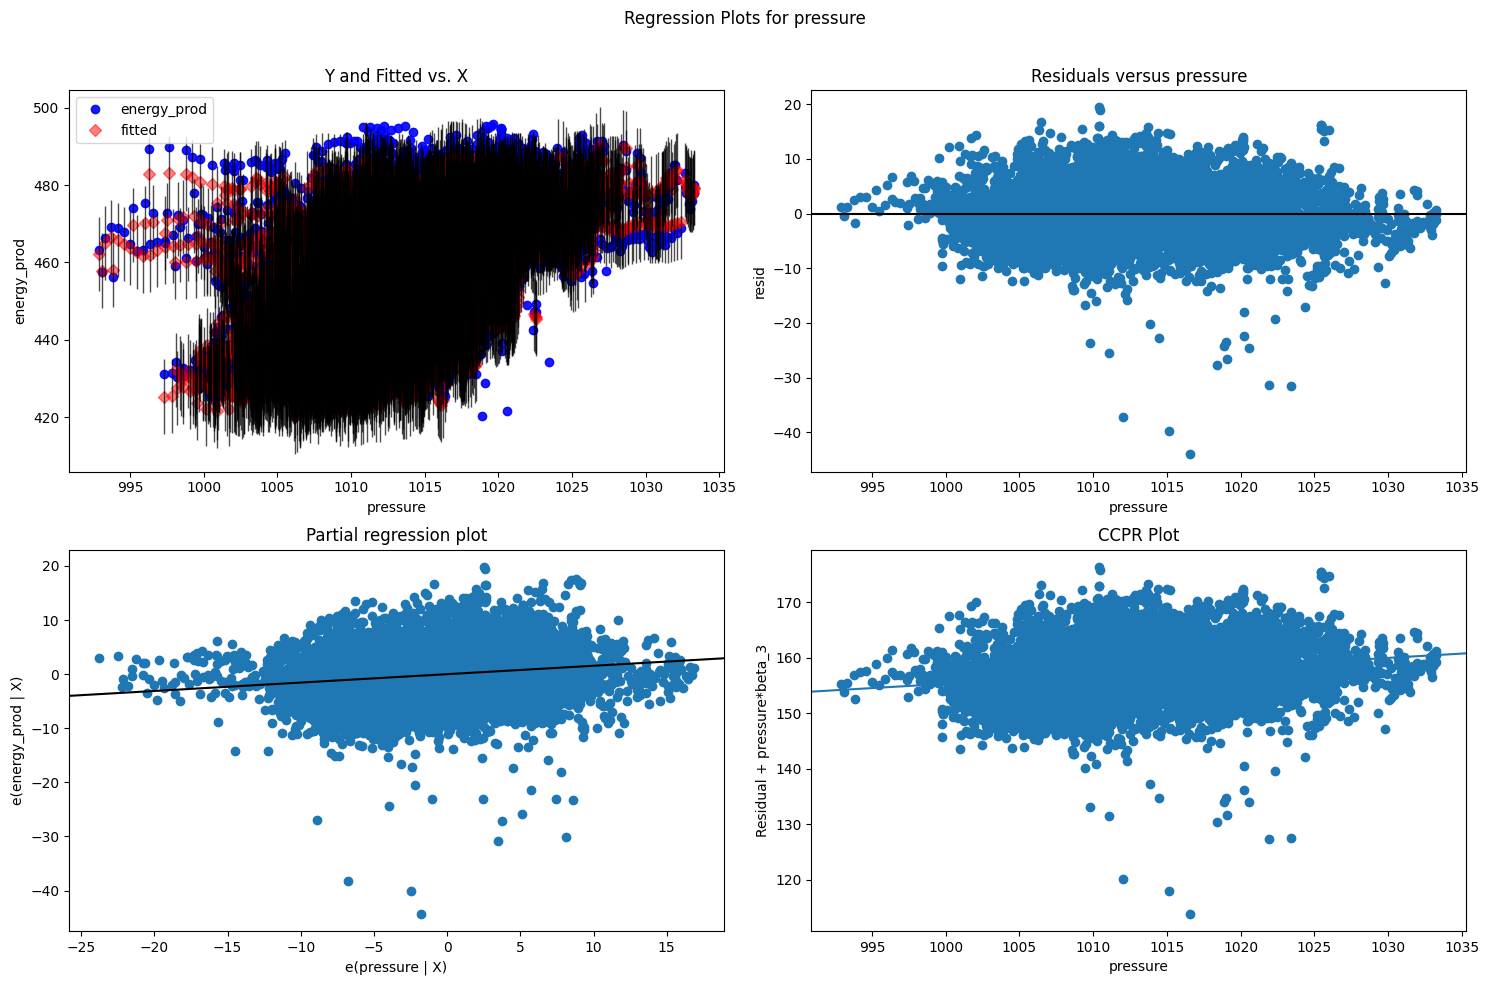

In [129]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_1, "pressure", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Cook’s Distance

In [130]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance

In [131]:
(c, _) = model_1.get_influence().cooks_distance

In [132]:
model_1.get_influence().cooks_distance

(array([7.12010478e-05, 1.11910272e-04, 4.82215900e-05, ...,
        2.50581094e-04, 3.36121842e-03, 1.14382718e-04]),
 array([0.99999999, 0.99999997, 1.        , ..., 0.99999987, 0.9999775 ,
        0.99999997]))

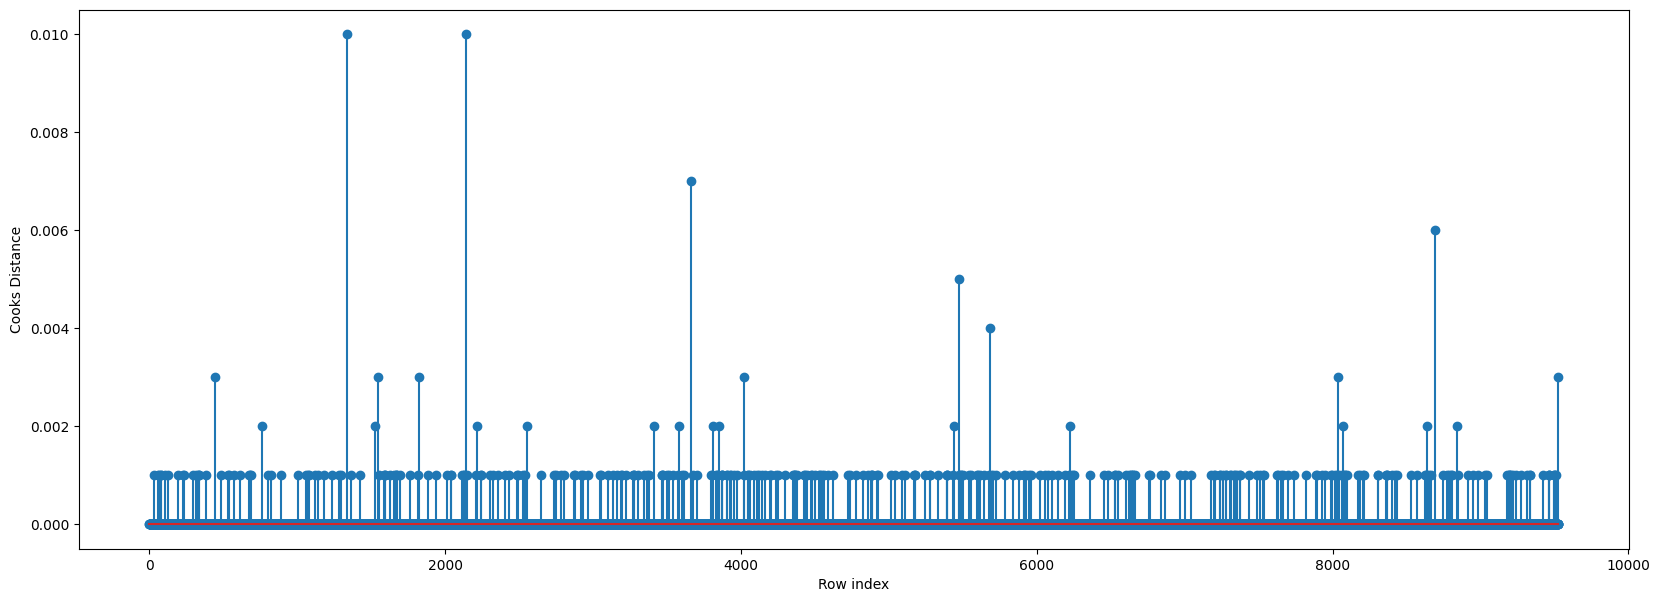

In [133]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(1339, 0.009870413660373459)

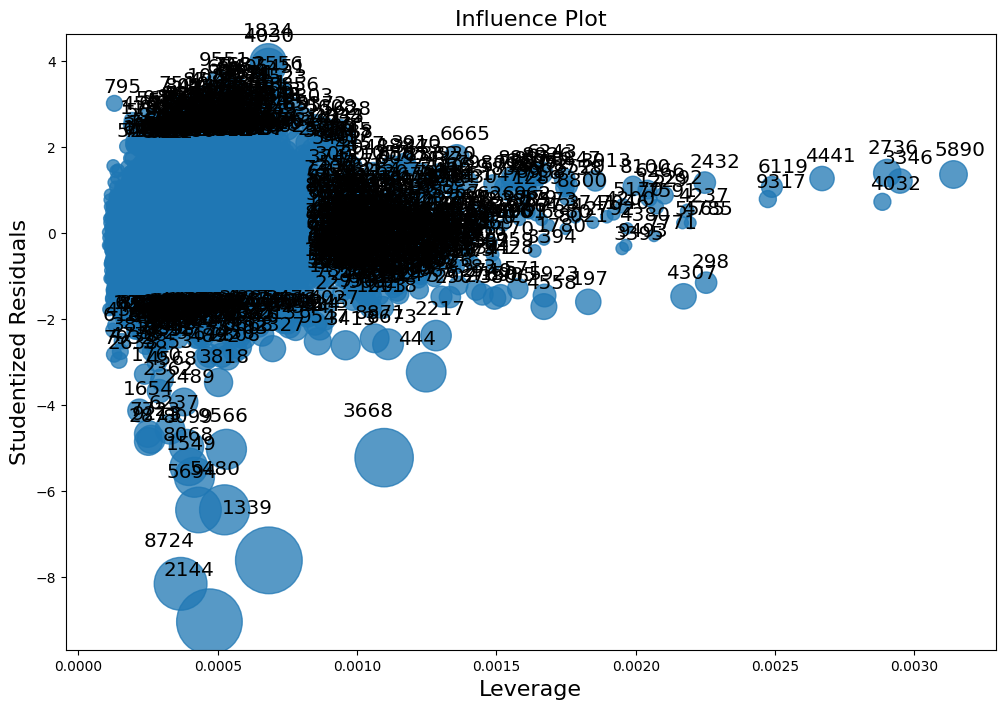

In [135]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(12,8))
fig=influence_plot(model_1,ax = ax)

In [136]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.0018893670620342186

### From the above plot, it is evident that points beyond leverage cutoff value=0.001889 are the outliers

In [137]:
print("R-squared:", model_1.rsquared)
print("Adjusted R-squared:", model_1.rsquared_adj)

R-squared: 0.9177822888000219
Adjusted R-squared: 0.9177563880194275


# Preparing MLR after spliting the data

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [50]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
     

LinearRegression()

In [51]:
# Make predictions on the testing set
y_pred_2 = model_2.predict(X_test)

In [52]:
# Evaluate model performance
model_2_mse = mean_squared_error(y_test, y_pred_2)
model_2_rmse = np.sqrt(mse)
model_2_r2 = r2_score(y_test, y_pred_2)

In [53]:
print("Mean Squared Error:", model_2_mse)
print("Root Mean Squared Error:", model_2_rmse)
print("R-squared:", model_2_r2)

Mean Squared Error: 21.812184231494626
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.9257422734223831


# Using PCA MODEL

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure', 'humidity']]
y = data['energy_prod']

In [56]:
data.columns

Index(['tem', 'exh_vac', 'pressure', 'humidity', 'energy_prod'], dtype='object')

In [57]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [59]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.61023011 0.22680402 0.13727706 0.02568881]


In [60]:
# Decide on the number of components to retain based on explained variance
# You can also specify the number of components explicitly if desired
n_components = 2  # Example: Retain the first 2 principal components

In [61]:
# Retain the specified number of principal components
X_pca_selected = X_pca[:, :n_components]

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=7)

In [63]:
# Fit a regression model (e.g., Linear Regression) using the principal components
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [64]:
# Make predictions on the testing set
y_pred_3 = model_3.predict(X_test)

In [65]:
# Evaluate model performance
model_3_mse = mean_squared_error(y_test, y_pred_3)
model_3_rmse = np.sqrt(mse)
model_3_r2 = r2_score(y_test, y_pred_3)

In [66]:
print("Mean Squared Error:", model_3_mse)
print("Root Mean Squared Error:", model_3_rmse)
print("R-squared:", model_3_r2)

Mean Squared Error: 45.15785725410622
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.8462639146443385


# Using Decision Tree Regression

In [67]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [69]:
from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor(random_state = 0)
model_4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
# Make predictions on the testing set
y_pred_4 = model_4.predict(X_test)

In [71]:
# Evaluate model performance
model_4_mse = mean_squared_error(y_test, y_pred_4)
model_4_rmse = np.sqrt(mse)
model_4_r2 = r2_score(y_test, y_pred_4)

In [72]:
print("Mean Squared Error:", model_4_mse)
print("Root Mean Squared Error:", model_4_rmse)
print("R-squared:", model_4_r2)

Mean Squared Error: 24.218072298006295
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.9175516320669239


# Using Polynomial Regression

In [73]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
model_5 = LinearRegression()
model_5.fit(X_poly, y_train)

LinearRegression()

In [76]:
# Make predictions on the testing set
y_pred_5 = model_5.predict(poly_reg.transform(X_test))

In [77]:
# Evaluate model performance
model_5_mse = mean_squared_error(y_test, y_pred_5)
model_5_rmse = np.sqrt(mse)
model_5_r2 = r2_score(y_test, y_pred_5)

In [78]:
print("Mean Squared Error:", model_5_mse)
print("Root Mean Squared Error:", model_5_rmse)
print("R-squared:", model_5_r2)

Mean Squared Error: 19.049183180368487
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.9351486755694887


# Using Random Forest Regression

In [79]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [81]:
from sklearn.ensemble import RandomForestRegressor
model_6 = RandomForestRegressor(n_estimators = 10, random_state = 0)
model_6.fit(X_train, y_train)
     

RandomForestRegressor(n_estimators=10, random_state=0)

In [82]:
# Make predictions on the testing set
y_pred_6 = model_6.predict(X_test)

In [83]:
# Evaluate model performance
model_6_mse = mean_squared_error(y_test, y_pred_6)
model_6_rmse = np.sqrt(mse)
model_6_r2 = r2_score(y_test, y_pred_6)

In [84]:
print("Mean Squared Error:", model_6_mse)
print("Root Mean Squared Error:", model_6_rmse)
print("R-squared:", model_6_r2)

Mean Squared Error: 13.753535418677856
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.9531772580977431


# Using Support Vector Regression (SVR)

In [85]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [87]:
from sklearn.svm import SVR
model_7 = SVR(kernel = 'rbf')
model_7.fit(X_train, y_train)

SVR()

In [88]:
# Make predictions on the testing set
y_pred_7 = model_7.predict(X_test)

In [89]:
# Evaluate model performance
model_7_mse = mean_squared_error(y_test, y_pred_7)
model_7_rmse = np.sqrt(mse)
model_7_r2 = r2_score(y_test, y_pred_7)

In [90]:
print("Mean Squared Error:", model_7_mse)
print("Root Mean Squared Error:", model_7_rmse)
print("R-squared:", model_7_r2)

Mean Squared Error: 184.04992333383316
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.37341768534023523


# Using XGBoost Model

In [91]:
# Define the features and target variable
X = data[['tem', 'exh_vac', 'pressure','humidity']]
y = data['energy_prod']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [99]:
!pip install xgboost
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 244.7/297.1 MB 58.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.9 MB/s eta 0:00:00:00:0100:01


In [100]:
model_8 = xgb.XGBRegressor(random_state=0)
model_8.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [101]:
# Make predictions on the testing set
y_pred_8 = model_8.predict(X_test)

In [102]:
# Evaluate model performance
model_8_mse = mean_squared_error(y_test, y_pred_8)
model_8_rmse = np.sqrt(mse)
model_8_r2 = r2_score(y_test, y_pred_8)

In [103]:
print("Mean Squared Error:", model_8_mse)
print("Root Mean Squared Error:", model_8_rmse)
print("R-squared:", model_8_r2)

Mean Squared Error: 11.227523254958427
Root Mean Squared Error: 4.9175122816450125
R-squared: 0.9617768517282779


# Table of Model Accuracy

In [139]:
table=pd.DataFrame({'Name of Model':['MLR using OLS','MLR after Spliting','PCA','Decision Tree','Polynomial Regression','Random Forest','SVR','XGBoost'],'Prep_Models':['model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8'],'Rsquared':[model_1.rsquared,model_2_r2,model_3_r2,model_4_r2,model_5_r2,model_6_r2,model_7_r2,model_8_r2]})
table

,Name of Model,Prep_Models,Rsquared
0,MLR using OLS,model_1,0.917782
1,MLR after Spliting,model_2,0.925742
2,PCA,model_3,0.846264
3,Decision Tree,model_4,0.917552
4,Polynomial Regression,model_5,0.935149
5,Random Forest,model_6,0.953177
6,SVR,model_7,0.373418
7,XGBoost,model_8,0.961777


### From the above table, it is clear that XGBoost model is the best model for the given dataset. It gives 96.17% accuracy.

In [105]:
import pickle

In [141]:
with open('/workspaces/codespaces-jupyter/model_8 (1).pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [142]:
print("Model loaded successfully from 'model_8.pkl'.")

Model loaded successfully from 'model_8.pkl'.
